In [31]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
api_key = '9engYOyGjKdMVtgVfe0gMjX7e'
api_secret_key = 'mWt9ezxyPPwxbfEsdUUyqL3HCKiEW3NTdJ4bYc9cGzMcuj1BS7'
access_token = '396483432-L4Dfs1HCF8WHS7r2Cj6EWkQvFldd9HIApuJ9dWPa'
access_toket_secret = '5NhiysOkDkGPglmOmhtjrzP2XPULp6hlK9JzOKd0QBvKr'

In [33]:
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_toket_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [53]:
#Gather the 2000 tweets about bitcoin
search_term = 'Palestina -filter:retweets'
#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since = '2021-05-11', tweet_mode = 'extended').items(2000)
#Store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [54]:
#Create a dataFrame to store 
df = pd.DataFrame(all_tweets, columns=['Tweets'])

df.head(5)

,Tweets
0,@DoggyRokky Pro Palestina: ewww so religion-th...
1,I live in a country where native german offici...
2,I have a dream...\n#Palestina https://t.co/Xqt...
3,@mgimo_en I share with you this thought:\nhttp...
4,@mfadl55 @SohailAnwer @WSJ Maybe you should re...


In [55]:
#Create a function to cclean the tweets
def cleanTwt(twt):
  twt = re.sub('#Palestina', 'Palestina', twt) #remove the hastag '#' from bitcoin
  twt = re.sub('#palestina', 'palestina', twt) #remove the hastag '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#' 
  twt = re.sub('\\n','', twt) #removes the '\n' string 
  twt = re.sub('https?:\/\/S+','',twt ) #removes any hyperlinks
  return twt

In [56]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

In [57]:
df.head()

,Tweets,Cleaned_Tweets
0,@DoggyRokky Pro Palestina: ewww so religion-th...,@DoggyRokky Pro Palestina: ewww so religion-th...
1,I live in a country where native german offici...,I live in a country where native german offici...
2,I have a dream...\n#Palestina https://t.co/Xqt...,I have a dream...Palestina https://t.co/Xqt4Cy...
3,@mgimo_en I share with you this thought:\nhttp...,@mgimo_en I share with you this thought:https:...
4,@mfadl55 @SohailAnwer @WSJ Maybe you should re...,@mfadl55 @SohailAnwer @WSJ Maybe you should re...


In [58]:
#Create a function to get the subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two ne columns called 'Subjectivity' & Polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,@DoggyRokky Pro Palestina: ewww so religion-th...,@DoggyRokky Pro Palestina: ewww so religion-th...,0.483333,0.033333
1,I live in a country where native german offici...,I live in a country where native german offici...,0.166667,0.012121
2,I have a dream...\n#Palestina https://t.co/Xqt...,I have a dream...Palestina https://t.co/Xqt4Cy...,0.000000,0.000000
3,@mgimo_en I share with you this thought:\nhttp...,@mgimo_en I share with you this thought:https:...,0.000000,0.000000
4,@mfadl55 @SohailAnwer @WSJ Maybe you should re...,@mfadl55 @SohailAnwer @WSJ Maybe you should re...,0.950000,-0.450000


In [59]:
#Create a Function to get the sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [60]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@DoggyRokky Pro Palestina: ewww so religion-th...,@DoggyRokky Pro Palestina: ewww so religion-th...,0.483333,0.033333,Positive
1,I live in a country where native german offici...,I live in a country where native german offici...,0.166667,0.012121,Positive
2,I have a dream...\n#Palestina https://t.co/Xqt...,I have a dream...Palestina https://t.co/Xqt4Cy...,0.000000,0.000000,Neutral
3,@mgimo_en I share with you this thought:\nhttp...,@mgimo_en I share with you this thought:https:...,0.000000,0.000000,Neutral
4,@mfadl55 @SohailAnwer @WSJ Maybe you should re...,@mfadl55 @SohailAnwer @WSJ Maybe you should re...,0.950000,-0.450000,Negative


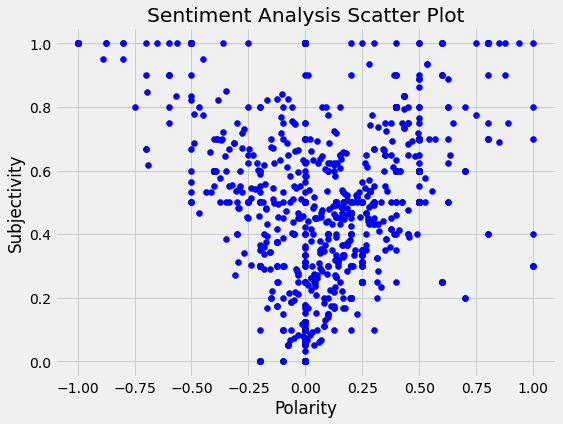

In [61]:
#Create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


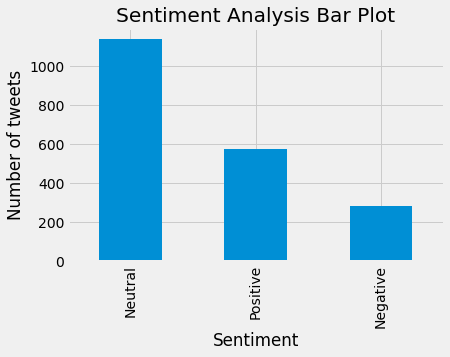

In [62]:
#Create a bar chart to show the count of Possitive, Neutral, and Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

In [63]:
df['Sentiment'].value_counts()

Neutral     1140
Positive     578
Negative     282
Name: Sentiment, dtype: int64

In [45]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [70]:
df_2=df[df['Sentiment']=='Positive']

In [71]:
df_2

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@DoggyRokky Pro Palestina: ewww so religion-th...,@DoggyRokky Pro Palestina: ewww so religion-th...,0.483333,0.033333,Positive
1,I live in a country where native german offici...,I live in a country where native german offici...,0.166667,0.012121,Positive
8,Israeli citizen going to kill a #Palestina pe...,Israeli citizen going to kill a Palestina pea...,0.500000,0.250000,Positive
12,"@astrofan80 Hallo, here is your unroll: Update...","@astrofan80 Hallo, here is your unroll: Update...",0.600000,0.700000,Positive
25,@GunRomli War is always devastating.. Anak2 da...,@GunRomli War is always devastating.. Anak2 da...,0.725000,0.125000,Positive
30,@pjmsperiod @Aiye @palestina_esp @jungselbst @...,@pjmsperiod @Aiye @palestina_esp @jungselbst @...,0.888889,0.500000,Positive
31,@ikalin1 Destroy hamas for a free and prospero...,@ikalin1 Destroy hamas for a free and prospero...,0.400000,0.100000,Positive
33,"Day and night, bombings continue on Gaza and m...","Day and night, bombings continue on Gaza and m...",0.500000,0.500000,Positive
44,@gunlerdenebru @trtworld This is not genocide....,@gunlerdenebru @trtworld This is not genocide....,0.611111,0.383333,Positive
46,Free palestina from the terrorists #GazzaUnder...,Free palestina from the terrorists,0.800000,0.400000,Positive


In [72]:
df_2.to_csv('sentiment_positive.csv')